## Data Import and Inital Setup

In [143]:
import pandas as pd
import numpy as np

In [144]:
first_df = pd.read_csv("Fraud.csv")

## Dataset Overview

In [145]:
first_df.shape

(6362620, 11)

In [146]:
first_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Class Imbalance Check

In [147]:
value_fraud = first_df['isFraud'].value_counts()
print(value_fraud)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [148]:
value_fraud = first_df['isFlaggedFraud'].value_counts()
print(value_fraud)

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


## Zero Balance Check

In [149]:
first_df.isin([0]).sum()

step                    0
type                    0
amount                 16
nameOrig                0
oldbalanceOrg     2102449
newbalanceOrig    3609566
nameDest                0
oldbalanceDest    2704388
newbalanceDest    2439433
isFraud           6354407
isFlaggedFraud    6362604
dtype: int64

## Data Info & Cleaning

In [150]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [151]:
first_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Merchant Logic

In [152]:
print((first_df['nameDest'].str.startswith('M')).sum())

2151495


In [153]:
isFlagged_data = first_df[first_df['isFlaggedFraud'] == 1]
isFlagged_data.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


## Feature Engineering

In [154]:
first_df['isMerchant'] = first_df['nameDest'].str.startswith('M').astype(int)

In [155]:
mer_frd_counts = first_df.groupby(['isMerchant', 'isFraud']).size().unstack()
mer_frd_counts

isFraud,0,1
isMerchant,,
0,4202912.0,8213.0
1,2151495.0,NaN


In [156]:
first_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'isMerchant'],
      dtype='object')

In [157]:
first_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isMerchant
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


In [158]:
first_df.loc[first_df['isMerchant'] == 1, ['oldbalanceDest', 'newbalanceDest']] = np.nan

In [159]:
first_df['hasBalDestInfo'] = first_df['oldbalanceDest'].notna().astype(int)

In [160]:
first_df['errorBalOrg'] = first_df['oldbalanceOrg'] - first_df['newbalanceOrig'] - first_df['amount']
first_df['errorBalDes'] = first_df['newbalanceDest'] - first_df['oldbalanceDest'] - first_df['amount']

In [161]:
isFraud_data = first_df[first_df['isFraud'] == 1]
isFraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isMerchant,hasBalDestInfo,errorBalOrg,errorBalDes
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,0,1,0.0,-181.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,0,1,0.0,-21363.0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,0,1,0.0,-2806.0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0,0,1,0.0,-29008.0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,0,1,0.0,-20128.0


In [162]:
first_df['OrgBalZero'] = (first_df['oldbalanceOrg'] == 0).astype(int) 

In [163]:
first_df['destBalZero'] = ((first_df['oldbalanceDest'] == 0) & (first_df['isMerchant'] == 0)).astype(int)

In [164]:
first_df['destBalZero'].value_counts()

destBalZero
0    5809727
1     552893
Name: count, dtype: int64

In [165]:
first_df['BalChngeRatioOrgin'] = first_df['amount']/ (first_df['oldbalanceOrg'] + 1)

In [166]:
first_df['isFullTrns'] = ((first_df['amount'] == first_df['OrgBalZero']) & (first_df['oldbalanceDest'] > 0)).astype(int)

In [167]:
first_df['recipientGotMoney'] = ((first_df['newbalanceDest'] - first_df['oldbalanceDest']) > 0).astype(int)
first_df.loc[first_df['hasBalDestInfo'] == 0,  'recipientGotMoney'] = np.nan

In [168]:
first_df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isMerchant,hasBalDestInfo,errorBalOrg,errorBalDes,OrgBalZero,destBalZero,BalChngeRatioOrgin,isFullTrns,recipientGotMoney
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,NaN,NaN,0,0,1,0,1.455192e-11,NaN,0,0,0.057834,0,NaN
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,NaN,NaN,0,0,1,0,-1.136868e-12,NaN,0,0,0.087731,0,NaN
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,0,1,0.000000e+00,-181.00,0,1,0.994505,0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,0,1,0.000000e+00,-21363.00,0,0,0.994505,0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,NaN,NaN,0,0,1,0,0.000000e+00,NaN,0,0,0.280788,0,NaN
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,NaN,NaN,0,0,1,0,-9.094947e-13,NaN,0,0,0.145146,0,NaN
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,NaN,NaN,0,0,1,0,-1.091394e-11,NaN,0,0,0.038799,0,NaN
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,NaN,NaN,0,0,1,0,1.364242e-11,NaN,0,0,0.044646,0,NaN
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,NaN,NaN,0,0,1,0,-1.353360e+03,NaN,0,0,1.506123,0,NaN
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,0,1,-3.637979e-12,-6886.98,0,0,0.127940,0,0.0


## Data Refinement

In [169]:
Second_df = first_df.drop(columns=['nameOrig', 'nameDest']).copy()

In [170]:
Second_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isMerchant,hasBalDestInfo,errorBalOrg,errorBalDes,OrgBalZero,destBalZero,BalChngeRatioOrgin,isFullTrns,recipientGotMoney
0,1,PAYMENT,9839.64,170136.0,160296.36,NaN,NaN,0,0,1,0,1.455192e-11,NaN,0,0,0.057834,0,NaN
1,1,PAYMENT,1864.28,21249.0,19384.72,NaN,NaN,0,0,1,0,-1.136868e-12,NaN,0,0,0.087731,0,NaN
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,1,0.000000e+00,-181.0,0,1,0.994505,0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0.000000e+00,-21363.0,0,0,0.994505,0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,NaN,NaN,0,0,1,0,0.000000e+00,NaN,0,0,0.280788,0,NaN


In [171]:
Second_df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

## Fraud Work — Rule-Based Exploration

In [172]:
fraud_df = Second_df[Second_df['type'].isin(['TRANSFER', 'CASH_OUT'])].copy()

In [173]:
fraud_df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud',
       'isMerchant', 'hasBalDestInfo', 'errorBalOrg', 'errorBalDes',
       'OrgBalZero', 'destBalZero', 'BalChngeRatioOrgin', 'isFullTrns',
       'recipientGotMoney'],
      dtype='object')

In [174]:
# Rule R2: Entire balance transferred
fraud_df['R2_isFullTransfer'] = fraud_df['isFullTrns']

# Rule R3: Origin account has zero balance
fraud_df['R3_origin_zero'] = fraud_df['OrgBalZero']

# Rule R4: Destination didn’t receive the money
fraud_df['R4_no_receipt'] = (fraud_df['recipientGotMoney'] == 0).astype(int)

# Rule R5: Inconsistent origin balance math
fraud_df['R5_bad_math_orig'] = (fraud_df['errorBalOrg'].abs() > 0.01).astype(int)

# Rule R6: Very high ratio of amount to origin balance
fraud_df['R6_ratio_high'] = (fraud_df['BalChngeRatioOrgin'] > 0.9).astype(int)


In [175]:
fraud_df['suspicious_score'] = (
    fraud_df['R2_isFullTransfer'] +
    fraud_df['R3_origin_zero'] +
    fraud_df['R4_no_receipt'] +
    fraud_df['R5_bad_math_orig'] +
    fraud_df['R6_ratio_high']
)


In [176]:
# How many rows have high suspicious score but are NOT labeled fraud?
potential_frauds = fraud_df[(fraud_df['suspicious_score'] >= 2) & (fraud_df['isFraud'] == 0)]
print(f"Potential frauds discovered: {len(potential_frauds)}")


Potential frauds discovered: 2490023


In [ ]:
# Original fraud OR logically suspicious
fraud_df['fraud_label'] = ((fraud_df['isFraud'] == 1) | (fraud_df['suspicious_score'] >= 2)).astype(int)

fraud_df['fraud_label'].value_counts()


fraud_label
1    2498236
0     272173
Name: count, dtype: int64

In [178]:
Second_df = Second_df.reset_index(drop=True)
Second_df['tx_id'] = Second_df.index
fraud_df['tx_id'] = fraud_df.index

In [179]:
columns_to_update = ['fraud_label', 'suspicious_score', 
                     'R2_isFullTransfer', 'R3_origin_zero', 'R4_no_receipt', 
                     'R5_bad_math_orig', 'R6_ratio_high']

# Set them as NaN in full df before updating
for col in columns_to_update:
    Second_df[col] = np.nan


In [180]:
Second_df.update(fraud_df.set_index('tx_id')[columns_to_update])

In [181]:
Second_df['fraud_label'] = Second_df['fraud_label'].fillna(0).astype(int)
Second_df['suspicious_score'] = Second_df['suspicious_score'].fillna(0).astype(int)


In [182]:
Second_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isMerchant,...,isFullTrns,recipientGotMoney,tx_id,fraud_label,suspicious_score,R2_isFullTransfer,R3_origin_zero,R4_no_receipt,R5_bad_math_orig,R6_ratio_high
0,1,PAYMENT,9839.64,170136.0,160296.36,NaN,NaN,0,0,1,...,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,PAYMENT,1864.28,21249.0,19384.72,NaN,NaN,0,0,1,...,0,NaN,1,0,0,NaN,NaN,NaN,NaN,NaN
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,...,0,0.0,2,1,2,0.0,0.0,1.0,0.0,1.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0,...,0,0.0,3,1,2,0.0,0.0,1.0,0.0,1.0
4,1,PAYMENT,11668.14,41554.0,29885.86,NaN,NaN,0,0,1,...,0,NaN,4,0,0,NaN,NaN,NaN,NaN,NaN


In [183]:
Second_df['fraud_label'].value_counts()

fraud_label
0    3864384
1    2498236
Name: count, dtype: int64

In [185]:
final_features = [
    'amount',
    'isMerchant',
    'hasBalDestInfo',
    'errorBalOrg',
    'errorBalDes',
    'OrgBalZero',
    'destBalZero',
    'BalChngeRatioOrgin',
    'isFullTrns',
    'recipientGotMoney',
    'fraud_label'
]


In [186]:
final_df = Second_df[final_features].copy()

In [187]:
final_df.head()

,amount,isMerchant,hasBalDestInfo,errorBalOrg,errorBalDes,OrgBalZero,destBalZero,BalChngeRatioOrgin,isFullTrns,recipientGotMoney,fraud_label
0,9839.64,1,0,1.455192e-11,NaN,0,0,0.057834,0,NaN,0
1,1864.28,1,0,-1.136868e-12,NaN,0,0,0.087731,0,NaN,0
2,181.00,0,1,0.000000e+00,-181.0,0,1,0.994505,0,0.0,1
3,181.00,0,1,0.000000e+00,-21363.0,0,0,0.994505,0,0.0,1
4,11668.14,1,0,0.000000e+00,NaN,0,0,0.280788,0,NaN,0


## Correlation Check

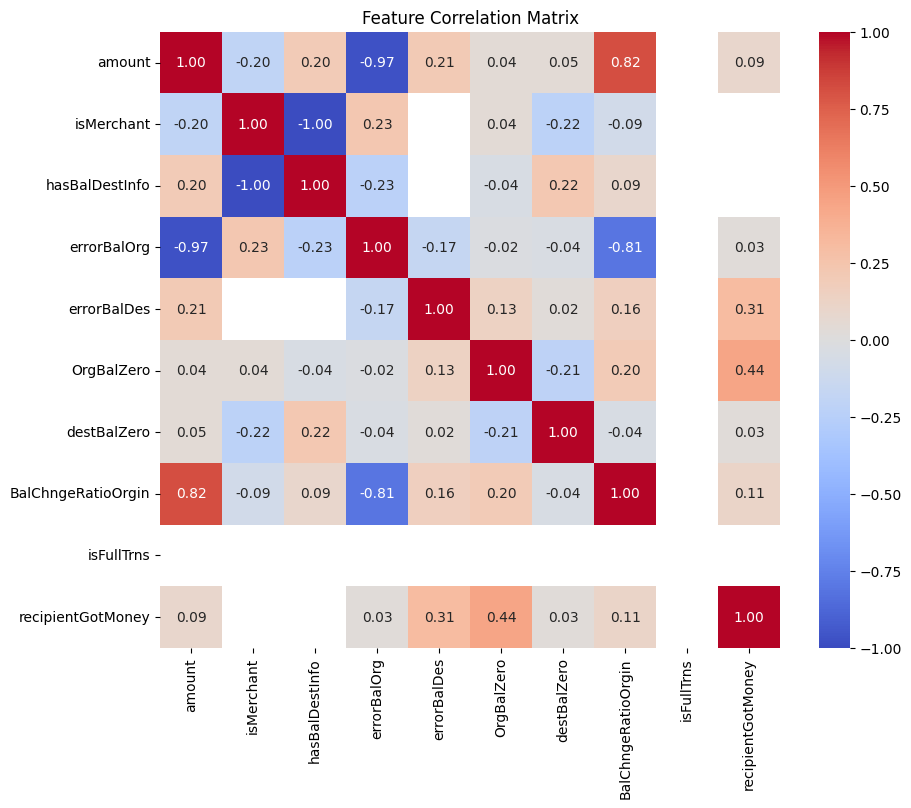

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(final_df.drop(columns='fraud_label').corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [192]:
final_df.isna().sum()

amount                      0
isMerchant                  0
hasBalDestInfo              0
errorBalOrg                 0
errorBalDes           2151495
OrgBalZero                  0
destBalZero                 0
BalChngeRatioOrgin          0
isFullTrns                  0
recipientGotMoney     2151495
fraud_label                 0
dtype: int64

In [193]:
X = final_df.drop(columns=['fraud_label']).copy()
y = final_df['fraud_label']

# Fill with a value that won't overlap with real values
X = X.fillna(-999)


## Feature Selection Using SelectKBest

In [194]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=7)
X_kbest = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())


Selected Features: ['amount', 'isMerchant', 'hasBalDestInfo', 'errorBalOrg', 'errorBalDes', 'BalChngeRatioOrgin', 'recipientGotMoney']


In [195]:
final_df.head()

,amount,isMerchant,hasBalDestInfo,errorBalOrg,errorBalDes,OrgBalZero,destBalZero,BalChngeRatioOrgin,isFullTrns,recipientGotMoney,fraud_label
0,9839.64,1,0,1.455192e-11,NaN,0,0,0.057834,0,NaN,0
1,1864.28,1,0,-1.136868e-12,NaN,0,0,0.087731,0,NaN,0
2,181.00,0,1,0.000000e+00,-181.0,0,1,0.994505,0,0.0,1
3,181.00,0,1,0.000000e+00,-21363.0,0,0,0.994505,0,0.0,1
4,11668.14,1,0,0.000000e+00,NaN,0,0,0.280788,0,NaN,0


In [196]:
top_5_features = ['amount', 'isMerchant', 'hasBalDestInfo', 'errorBalOrg', 'errorBalDes']


In [197]:
X_top5 = X[top_5_features]
y_top5 = y

## Outlier Handling

In [198]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Check outliers in 'amount'
outliers_amount = detect_outliers_iqr(X_top5, 'amount')
print(f"Outliers in 'amount': {len(outliers_amount)}")


Outliers in 'amount': 338078


In [200]:
import numpy as np

# Copy to preserve original
X_top5_clean = X_top5.copy()

# Step 1: Calculate IQR
Q1 = X_top5_clean['amount'].quantile(0.25)
Q3 = X_top5_clean['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR bounds for 'amount': [{lower_bound}, {upper_bound}]")

# Step 2: Cap extreme values
X_top5_clean['amount'] = np.clip(X_top5_clean['amount'], lower_bound, upper_bound)


IQR bounds for 'amount': [-279608.29125, 501719.33875]


## Model Training With XGBoost 

In [ ]:
pip install xgboost

In [211]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
X_train, X_test, y_train, y_test = train_test_split(
    X_top5_clean, y, test_size=0.3, random_state=42, stratify=y
)

In [213]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

In [216]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, ...)

In [217]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

## Model Evaluation

ROC AUC Score: 0.9997777333216219


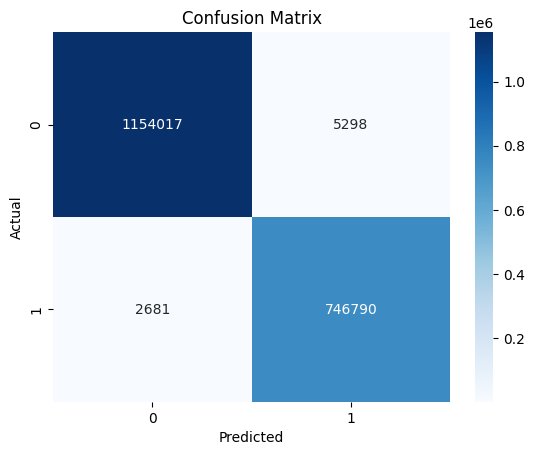

In [224]:

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [223]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1159315
           1       0.99      1.00      0.99    749471

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



## Check for over and under Fitting

In [220]:
from sklearn.metrics import roc_auc_score

# Training predictions
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]

print("Train ROC AUC:", roc_auc_score(y_train, y_train_proba))


Train ROC AUC: 0.9997886047332627


In [221]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_top5_clean, y, cv=5, scoring='roc_auc')
print("Cross-validation ROC AUC scores:", cv_scores)
print("Mean CV AUC:", cv_scores.mean())


Cross-validation ROC AUC scores: [0.99922043 0.9998809  0.99983731 0.99987845 0.999697  ]
Mean CV AUC: 0.9997028165092224


## Feature Imp. Interpretation

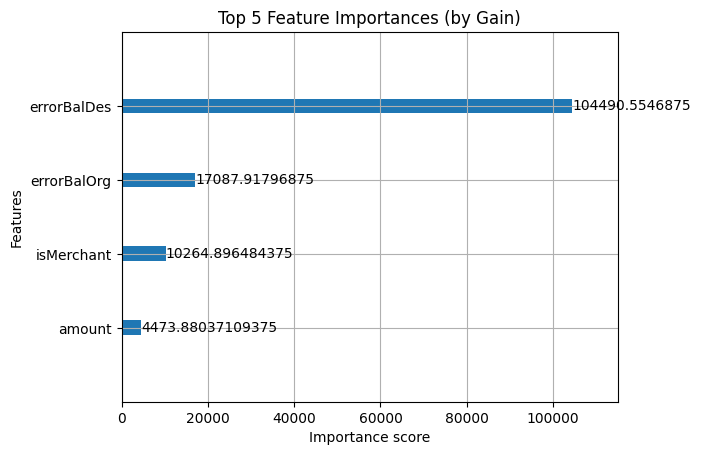

In [225]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot importance by 'gain' (how much each feature improves model splits)
plot_importance(model, importance_type='gain', max_num_features=5)
plt.title("Top 5 Feature Importances (by Gain)")
plt.show()